In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import feather
import os as os
os.environ["PROJ_LIB"] = "/Users/john/miniconda3/share/proj"; #fixr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [42]:
# Aggregate csv files
path = r'data/fishing_effort/daily_csvs/' # use your path
allFiles = glob.glob(path + "/*.csv")
allFiles = sorted(allFiles, key=lambda x: x[-13:-4])

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

dat = pd.concat(list_, axis = 0, ignore_index = True)

# Write data
dat.to_csv('data/2012-2016_daily_csvs.csv')
feather.write_dataframe(dat, "data/2012-2016_daily_csvs.feather")

In [24]:
# Open aggregate data
#dat = pd.read_csv('data/2012-2016_daily_csvs.csv')
dat = feather.read_dataframe("data/2012-2016_daily_csvs.feather")

# Parse date
dat['date'] = pd.to_datetime(dat['date'])
dat['year'] = dat['date'].dt.year
dat['month'] = dat['date'].dt.month
dat['lat_bin'] = round(dat['lat_bin'])
dat['lon_bin'] = round(dat['lon_bin'])

# Group by mmsi and year and average across
dat = dat.groupby(['lat_bin', 'lon_bin'], as_index=False).sum()

# Lat/Long correction
dat['lat_bin'] = dat['lat_bin']*.10
dat['lon_bin'] = dat['lon_bin']*.10

In [23]:
round(dat['lat_bin'])


0         -88.0
1         -88.0
2         -88.0
3         -88.0
4         -88.0
5         -88.0
6         -88.0
7         -88.0
8         -88.0
9         -88.0
10        -88.0
11        -88.0
12        -88.0
13        -88.0
14        -88.0
15        -88.0
16        -88.0
17        -88.0
18        -88.0
19        -88.0
20        -88.0
21        -88.0
22        -88.0
23        -87.0
24        -87.0
25        -87.0
26        -87.0
27        -87.0
28        -87.0
29        -78.0
           ... 
1383679    82.0
1383680    82.0
1383681    82.0
1383682    82.0
1383683    82.0
1383684    82.0
1383685    82.0
1383686    82.0
1383687    82.0
1383688    82.0
1383689    82.0
1383690    82.0
1383691    82.0
1383692    83.0
1383693    83.0
1383694    83.0
1383695    83.0
1383696    83.0
1383697    83.0
1383698    83.0
1383699    83.0
1383700    83.0
1383701    83.0
1383702    83.0
1383703    83.0
1383704    83.0
1383705    83.0
1383706    83.0
1383707    83.0
1383708    83.0
Name: lat_bin, Length: 1

# 2012 Average Global Fishing Location and Effort


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

MaskError: Mask and data not compatible: data size is 16830, mask size is 283248900.

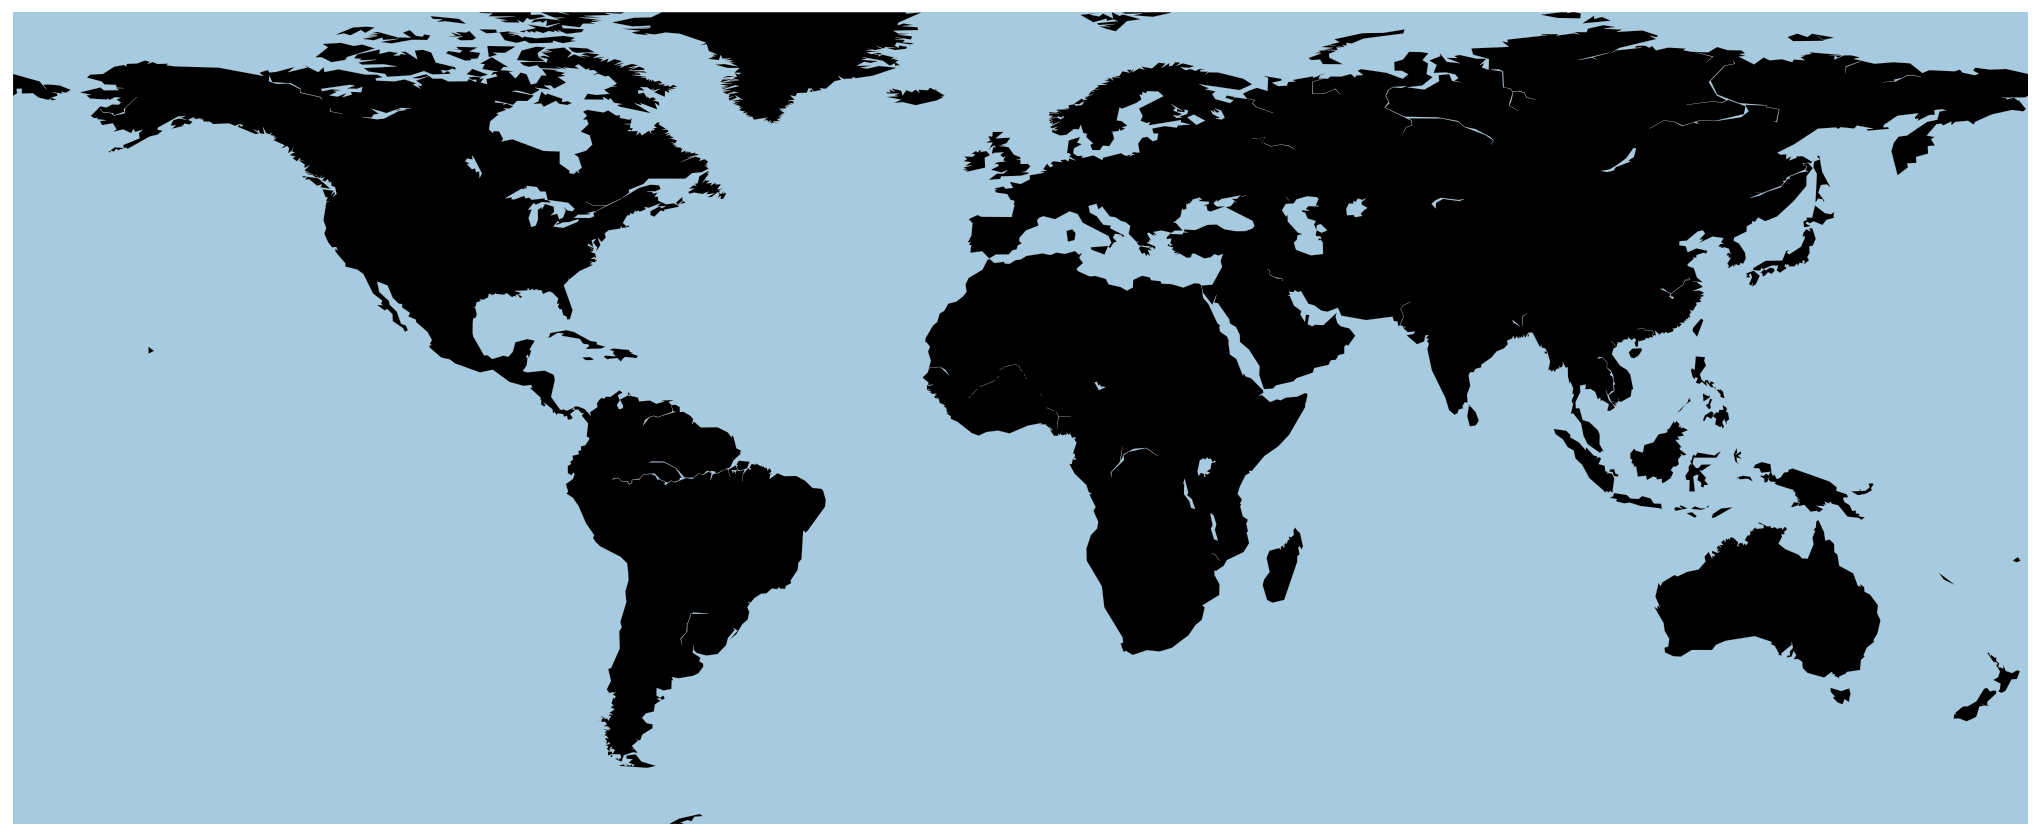

In [7]:
# Set the dimension of the figure
dat2 = dat[dat['year'] == 2012]
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=1)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
#dat2['fishing_hours'] = pd.factorize(dat2['fishing_hours'])[0]

# Add a point per position
#m.scatter(dat2['lon_bin'], dat2['lat_bin'], s=1, alpha=0.5, c=dat2['fishing_hours'], cmap="RdYlBu_r")

#ny = data.shape[0]; nx = data.shape[1]
#lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
#x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
#clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
#cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)

#X, Y = np.meshgrid(dat2['lon_bin'], dat2['lat_bin'])
#x,y = m(X,Y)
#data = dat2['fishing_hours']
#ny = data.shape[0]
#nx = data.shape[1]

#xx, yy = np.meshgrid(dat2['lon_bin'], dat2['lat_bin'])
#x, y = m(xx, yy)

#x = np.linspace(0, m.urcrnrx, 0)
#y = np.linspace(0, m.urcrnry, data.shape[0])
#xx, yy = np.meshgrid(x, y)

#lons, lats = m.makegrid(nx, ny)
#x, y = m(lons, lats)
lon = dat2['lon_bin'][:]
lat = dat2['lat_bin'][:]
var = dat2['fishing_hours'][:]

x, y = m(*np.meshgrid(lon, lat))
clevs = np.arange(0,10000,500)
m.contourf(x, y, var, clevs, )

#plt.contourf(x, y , mtoc_local.T, vmin=210, vmax=350,  cmap='RdPu') 

# copyright and source data info
plt.text( -170, -58,'2012 Average Global Fishing Location and Effort\n\nData Collected from Global Fishing Watch\nDaily Fishing Effort at 10th Degree Resolution by MMSI, 2012-2016\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=12, color='#555555' )
 
m.colorbar()
plt.show()


In [11]:
len(y)*len(x)

283248900

In [82]:
m(*np.meshgrid(lon, lat))

(array([[120.15      , 120.21666667, 119.868     , ..., 108.85      ,
         108.64054054, 112.70487805],
        [120.15      , 120.21666667, 119.868     , ..., 108.85      ,
         108.64054054, 112.70487805],
        [120.15      , 120.21666667, 119.868     , ..., 108.85      ,
         108.64054054, 112.70487805],
        ...,
        [120.15      , 120.21666667, 119.868     , ..., 108.85      ,
         108.64054054, 112.70487805],
        [120.15      , 120.21666667, 119.868     , ..., 108.85      ,
         108.64054054, 112.70487805],
        [120.15      , 120.21666667, 119.868     , ..., 108.85      ,
         108.64054054, 112.70487805]]),
 array([[22.5       , 22.5       , 22.5       , ..., 22.5       ,
         22.5       , 22.5       ],
        [22.45      , 22.45      , 22.45      , ..., 22.45      ,
         22.45      , 22.45      ],
        [38.06      , 38.06      , 38.06      , ..., 38.06      ,
         38.06      , 38.06      ],
        ...,
        [21.3     

# 2013 Average Global Fishing Location and Effort

/Users/john/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


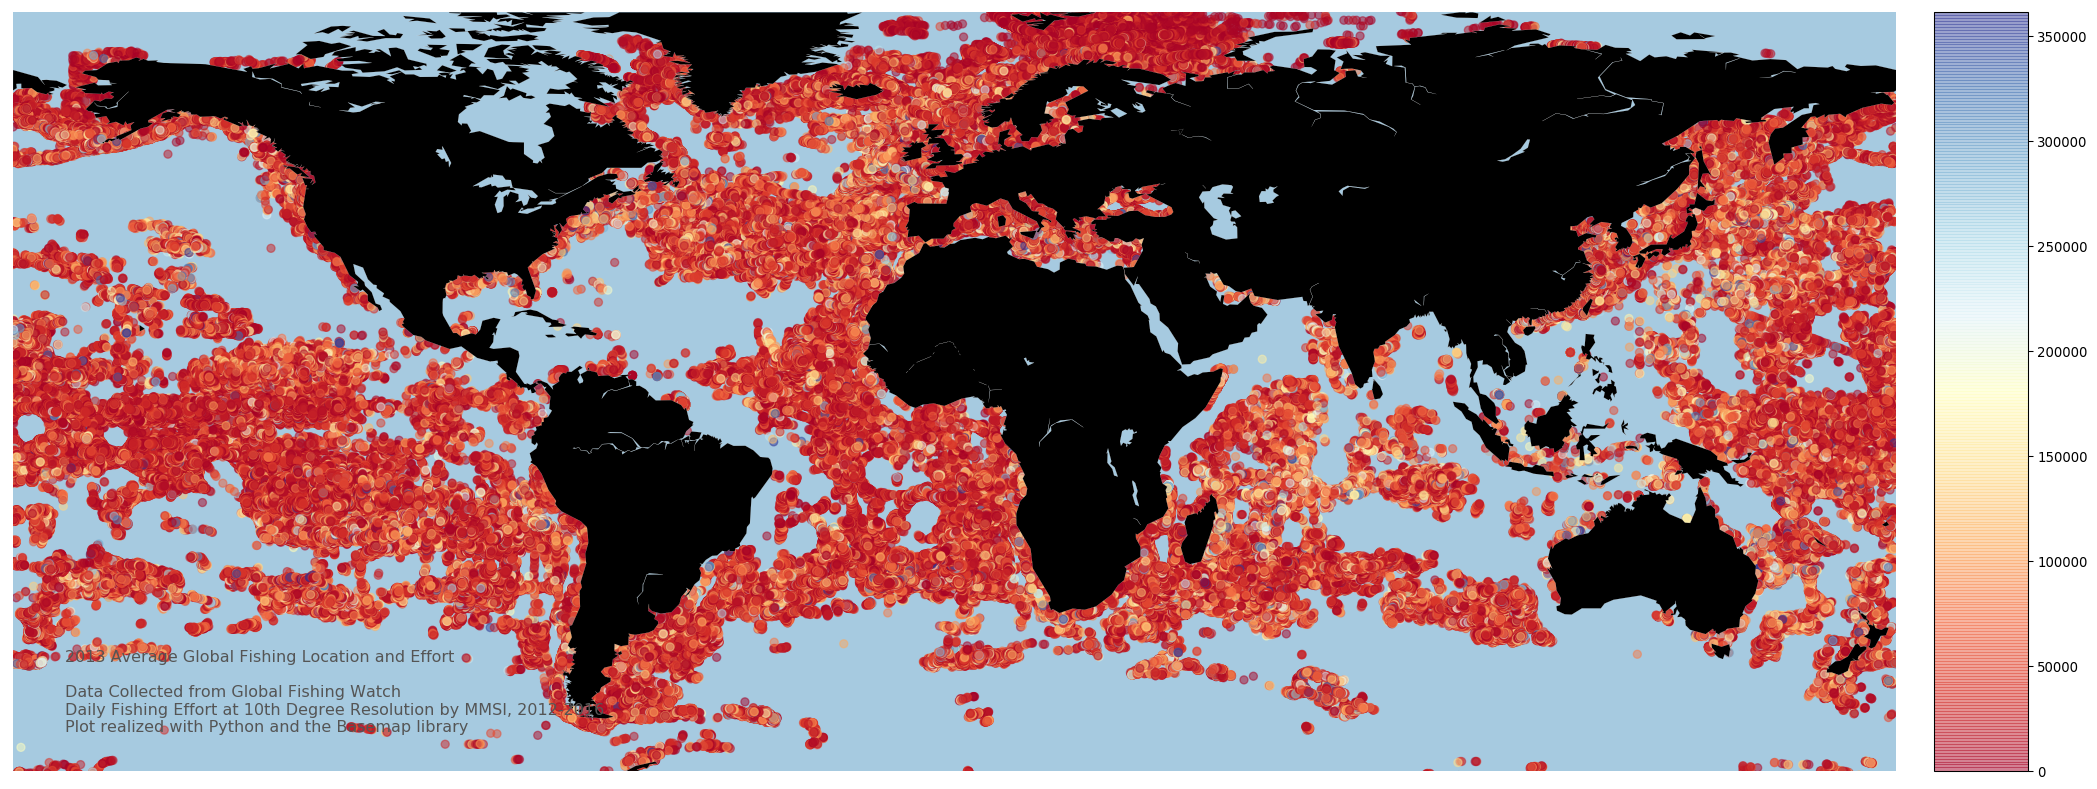

In [39]:
# Set the dimension of the figure
dat2 = dat[dat['year'] == 2013]
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=1)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
dat2['fishing_hours'] = pd.factorize(dat2['fishing_hours'])[0]

# Add a point per position
m.scatter(dat2['lon_bin'], dat2['lat_bin'], alpha=0.5, c=dat2['fishing_hours'], cmap="BuYlRd")
 

# copyright and source data info
plt.text( -170, -58,'2013 Average Global Fishing Location and Effort\n\nData Collected from Global Fishing Watch\nDaily Fishing Effort at 10th Degree Resolution by MMSI, 2012-2016\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=12, color='#555555' )
 
m.colorbar()
plt.show()


# 2014 Average Global Fishing Location and Effort

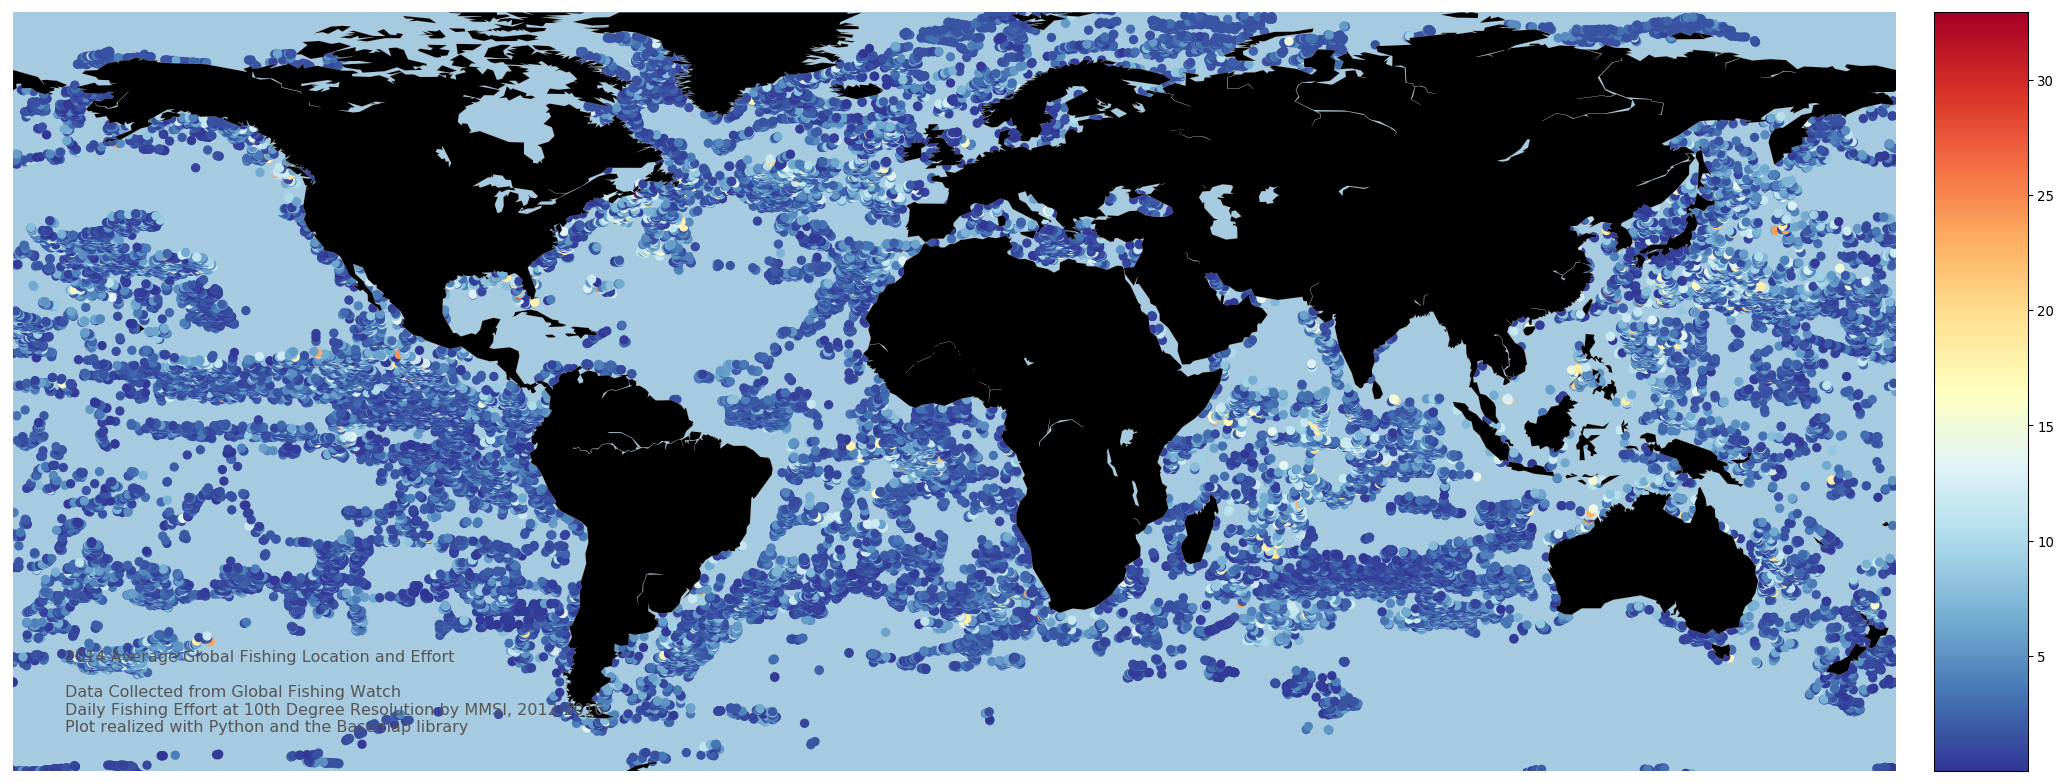

In [26]:
# Set the dimension of the figure
dat2 = dat[dat['year'] == 2014]
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=1)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
#dat2['fishing_hours'] = pd.factorize(dat2['fishing_hours'])[0]

# Add a point per position
m.scatter(dat2['lon_bin'], dat2['lat_bin'], c=dat2['fishing_hours'], cmap="RdYlBu_r")
 

# copyright and source data info
plt.text( -170, -58,'2014 Average Global Fishing Location and Effort\n\nData Collected from Global Fishing Watch\nDaily Fishing Effort at 10th Degree Resolution by MMSI, 2012-2016\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=12, color='#555555' )
 
m.colorbar()
plt.show()


In [ ]:
# 2015 Average Global Fishing Location and Effort

/Users/john/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


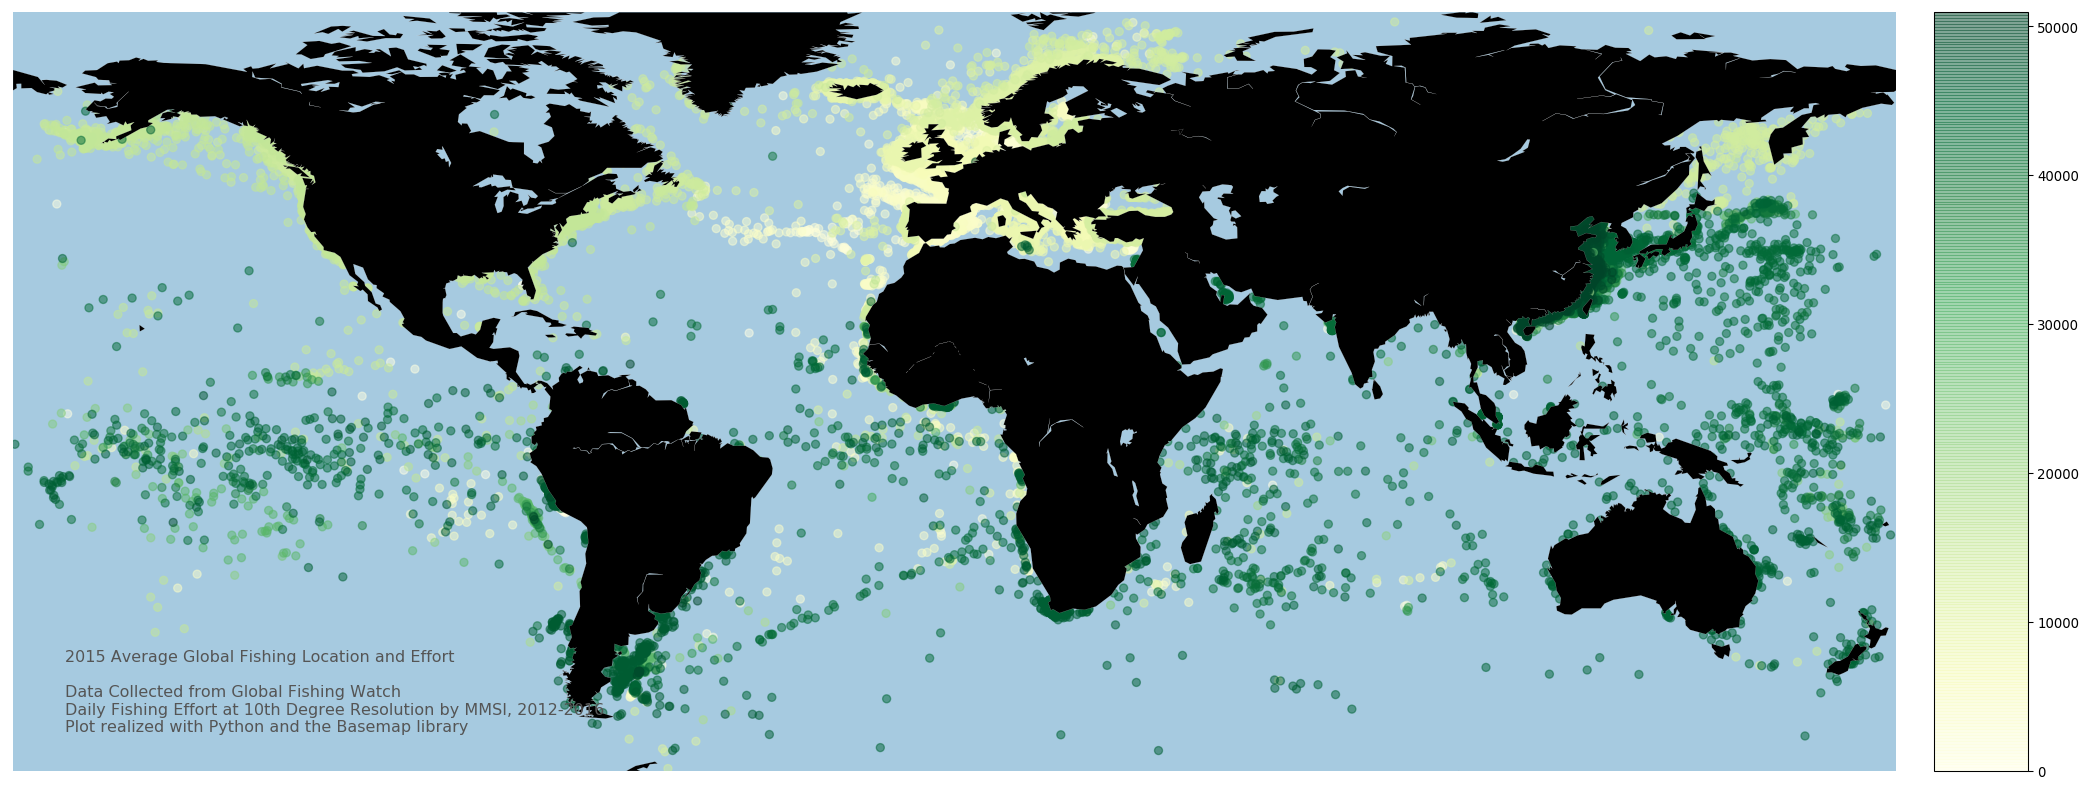

In [32]:
# Set the dimension of the figure
dat2 = dat[dat['year'] == 2015]
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=1)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
dat2['fishing_hours'] = pd.factorize(dat2['fishing_hours'])[0]

# Add a point per position
m.scatter(dat2['lon_bin'], dat2['lat_bin'], alpha=0.5, c=dat2['fishing_hours'], cmap="YlGn")
 

# copyright and source data info
plt.text( -170, -58,'2015 Average Global Fishing Location and Effort\n\nData Collected from Global Fishing Watch\nDaily Fishing Effort at 10th Degree Resolution by MMSI, 2012-2016\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=12, color='#555555' )
 
m.colorbar()
plt.show()


# 2016 Average Global Fishing Location and Effort

/Users/john/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


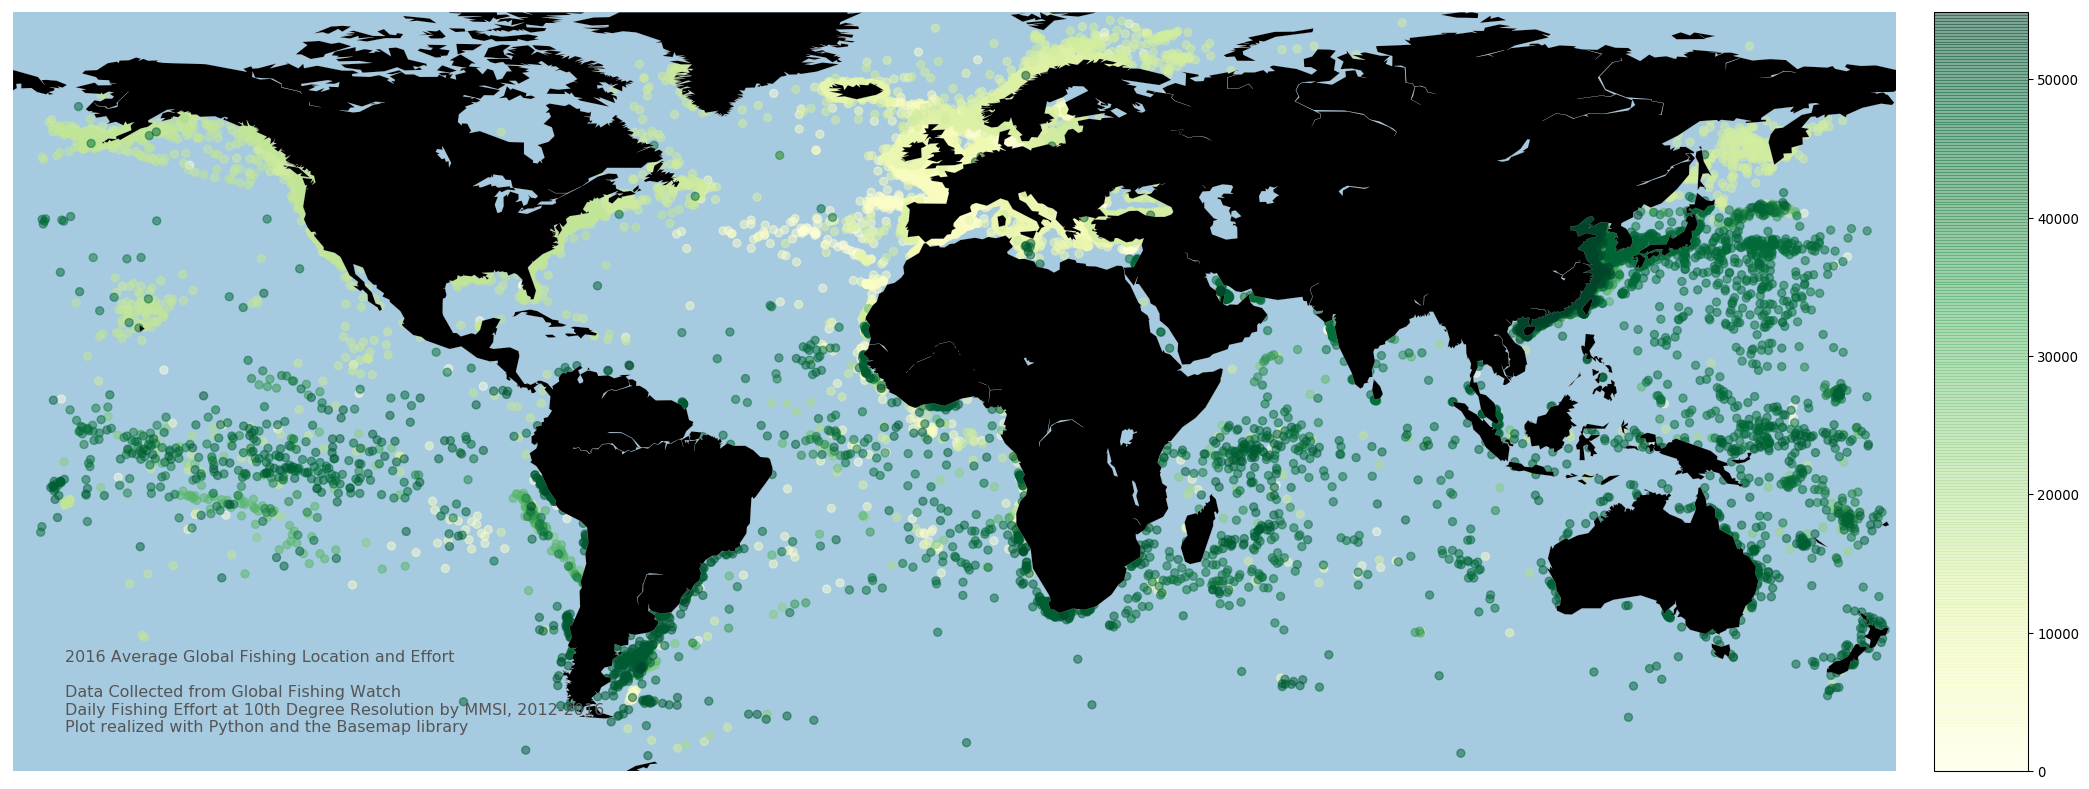

In [33]:
# Set the dimension of the figure
dat2 = dat[dat['year'] == 2016]
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=1)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
dat2['fishing_hours'] = pd.factorize(dat2['fishing_hours'])[0]

# Add a point per position
m.scatter(dat2['lon_bin'], dat2['lat_bin'], alpha=0.5, c=dat2['fishing_hours'], cmap="YlGn")
 

# copyright and source data info
plt.text( -170, -58,'2016 Average Global Fishing Location and Effort\n\nData Collected from Global Fishing Watch\nDaily Fishing Effort at 10th Degree Resolution by MMSI, 2012-2016\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=12, color='#555555' )
 
m.colorbar()
plt.show()


# 2012-2016 Average Global Fishing Location and Effort

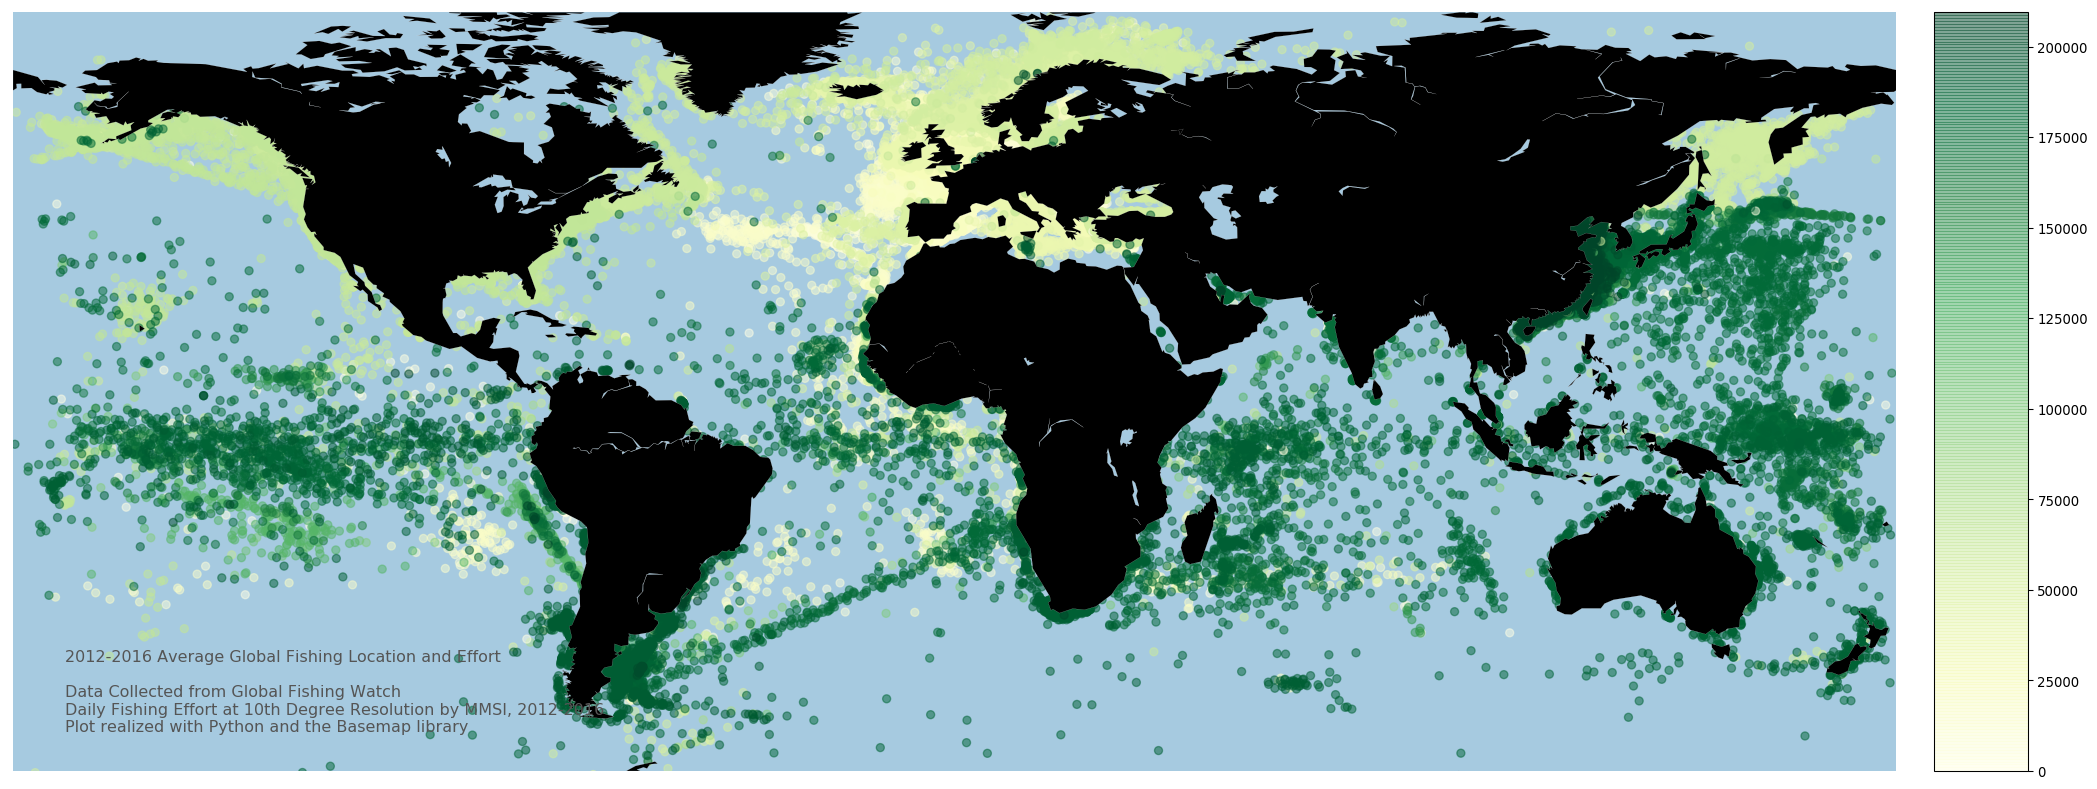

In [35]:
# Set the dimension of the figure
dat2 = dat
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=1)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
dat2['fishing_hours'] = pd.factorize(dat2['fishing_hours'])[0]

# Add a point per position
m.scatter(dat2['lon_bin'], dat2['lat_bin'], alpha=0.5, c=dat2['fishing_hours'], cmap="YlGn")
 

# copyright and source data info
plt.text( -170, -58,'2012-2016 Average Global Fishing Location and Effort\n\nData Collected from Global Fishing Watch\nDaily Fishing Effort at 10th Degree Resolution by MMSI, 2012-2016\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=12, color='#555555' )
 
m.colorbar()
plt.show()
